In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
#pip install -U scikit-learn

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\train.csv")

In [5]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8064,FDG45,8.100,Low Fat,0.128296,Fruits and Vegetables,210.4902,OUT045,2002,NaN,Tier 2,Supermarket Type1,5309.7550
3334,NCQ42,20.350,Low Fat,0.039236,Household,127.2678,OUT013,1987,High,Tier 3,Supermarket Type1,1017.3424
3843,FDU34,18.250,Low Fat,0.075501,Snack Foods,123.1046,OUT018,2009,Medium,Tier 3,Supermarket Type2,249.0092
3922,NCW53,NaN,Low Fat,0.030347,Health and Hygiene,192.5162,OUT027,1985,Medium,Tier 3,Supermarket Type3,3078.6592
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store,280.9676


Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [6]:
data.shape

(8523, 12)

Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Check Null Values In The Dataset


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Taking Care of Duplicate Values


In [10]:
data.duplicated().any()

np.False_

Handling The missing Values


In [11]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [12]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Univariate Imputation


In [13]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [14]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [15]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [16]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [17]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


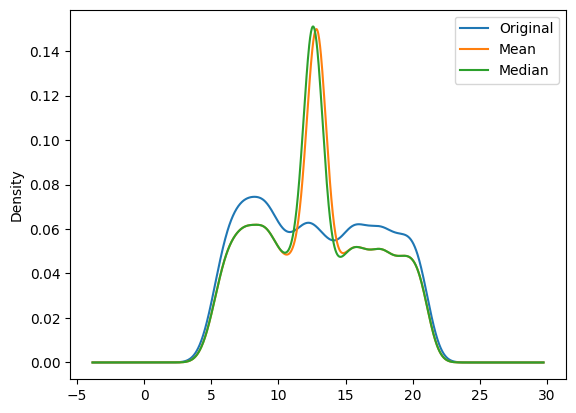

In [18]:
data['Item_Weight'].plot(kind = "kde",label="Original")
data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")
data['Item_Weight_median'].plot(kind = "kde",label = "Median")
plt.legend()
plt.show()

<Axes: >

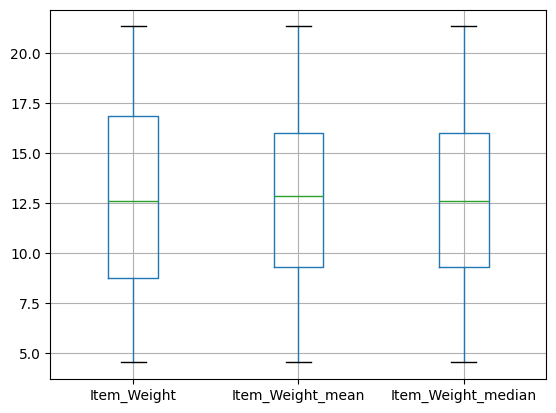

In [19]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

Multivariate Imputaion


In [20]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

In [142]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()


KeyError: 'Item_Weight'

In [22]:
import sklearn

In [23]:
from sklearn.impute import KNNImputer


In [24]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [25]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()


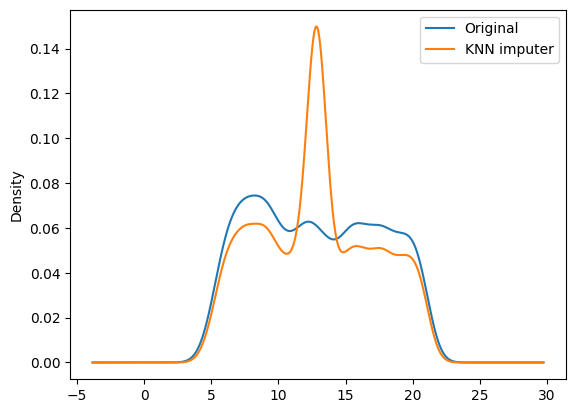

In [26]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [27]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)


In [28]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [29]:
data.isnull().sum()


Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

Outlet_Size


In [30]:
data['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [31]:
data['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [32]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))


In [33]:
mode_outlet


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [34]:
missing_values = data['Outlet_Size'].isnull()


In [35]:
missing_values


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [36]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])


In [37]:
data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [38]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

Item_Fat_Content


In [39]:
data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [40]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)


In [41]:
data['Item_Fat_Content'].value_counts()


Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [42]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [43]:
data['Item_Visibility'].value_counts()


Item_Visibility
0.000000    526
0.076975      3
0.107274      2
0.074613      2
0.045166      2
           ... 
0.056783      1
0.046982      1
0.035186      1
0.145221      1
0.016827      1
Name: count, Length: 7880, dtype: int64

In [44]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')


In [45]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [46]:
data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.076975    3
0.096592    2
0.093308    2
0.076792    2
0.107274    2
           ..
0.070712    1
0.036133    1
0.124111    1
0.094146    1
0.138190    1
Name: count, Length: 8405, dtype: int64

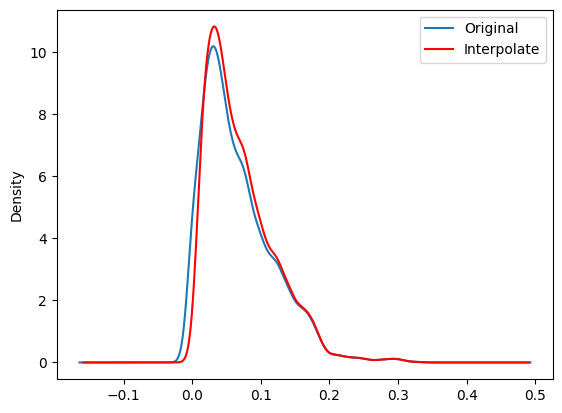

In [47]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()


In [48]:
data = data.drop('Item_Visibility',axis=1)


In [49]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [50]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [51]:
data['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [52]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [53]:
data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
FDA13    8
FDF34    6
FDQ25    5
DRM49    5
NCP18    7
Name: count, dtype: int64

In [54]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])


In [55]:
data['Item_Identifier'].value_counts()


Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [56]:
data['Outlet_Establishment_Year']


0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [57]:
import datetime as dt



In [58]:
current_year = dt.datetime.today().year


In [59]:
current_year


2024

In [60]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']


In [61]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [62]:
data = data.drop('Outlet_Establishment_Year',axis=1)


In [63]:
data.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


Handling Categorical Columns


In [64]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [65]:
data_encoded.head(3)


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [66]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [67]:
y


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Random Forest Regressor


In [68]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


XGBRFRegressor


In [75]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.596332173045327


XGBRFRegressor Feature importances


In [111]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.423386
10,Outlet_age,0.169442
3,Item_MRP,0.160600
5,Outlet_Size,0.101296
4,Outlet_Identifier,0.099362
6,Outlet_Location_Type,0.036353
9,Item_Visibility_interpolate,0.003181
8,Item_Weight_interploate,0.002475
2,Item_Type,0.002263
0,Item_Identifier,0.000967


In [69]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [79]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [81]:
final_data


,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


Best Model


In [83]:
xg_final = XGBRFRegressor()

In [85]:
xg_final.fit(final_data,y)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [89]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [91]:
xg_final.fit(X_train,y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [93]:
y_pred = xg_final.predict(X_test)


In [95]:
mean_absolute_error(y_test,y_pred)


np.float64(713.5792228647217)

Prediction on Unseen Data


In [97]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2058.0156


In [99]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1343.595703125 and 2772.435546875


Save Model Using Joblib


In [101]:
import joblib


In [103]:
joblib.dump(xg_final,'bigmart_model')


['bigmart_model']

In [105]:
model = joblib.load('bigmart_model')


In [107]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2058.0156


In [109]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1343.595703125 and 2772.435546875
